In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/4mo_deadhead_results.csv')
data.head()

,ServiceDate,Run,CostProxy,PctDeadhead
0,0015-01-01,9701,2460.000000,0.372764
1,0015-01-01,9706,3218.444444,0.414486
2,0015-01-01,9702,3466.666667,0.330865
3,0015-01-01,9703,3003.000000,0.199606
4,0015-01-01,9704,3843.500000,0.426727


In [3]:
data[data.PctDeadhead > 0.9]

,ServiceDate,Run,CostProxy,PctDeadhead
1026,0015-01-09,BD1,10243.000000,0.929806
1115,0015-03-03,BD3,3120.000000,0.903526
3754,0015-04-16,6060,3225.000000,0.954625
13573,0015-04-24,4121,1997.142857,0.922818


In [4]:
full_data = pd.read_csv('../data/UW_Trip_Data_FullHeaders.csv')
full_data.head()

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ServiceDate,Run,ProviderId,EvOrder,EvId,ReqTime,SchTime,ReqLate,Activity,ETA,...,BookingId,SchedStatus,SubtypeAbbr,FundingSourceId1,PassOn,SpaceOn,PassOff,SpaceOff,ClientId,MobAids
0,1/1/2014 0:00:00,9990,12,0,6198,17100,17100,-1,0,17100,...,17587166.0,1.0,SUB,2.0,CLI1,AM1,NaN,NaN,97539.0,LI
1,1/1/2014 0:00:00,9990,12,0,6199,-1,-1,19800,1,18176,...,17587166.0,1.0,SUB,2.0,NaN,NaN,CLI1,AM1,97539.0,LI
2,1/1/2014 0:00:00,9990,12,0,11305,68100,68100,-1,0,68100,...,17608867.0,1.0,DEM,1.0,CLI1,AM1,NaN,NaN,122812.0,NaN
3,1/1/2014 0:00:00,9990,12,0,11306,-1,-1,72000,1,69451,...,17608867.0,1.0,DEM,1.0,NaN,NaN,CLI1,AM1,122812.0,NaN
4,1/1/2014 0:00:00,9990,12,0,17419,73800,74700,-1,0,74700,...,17613026.0,1.0,WCL,2.0,CLI1,AM1,NaN,NaN,98986.0,NaN


In [5]:
full_data[(full_data.ServiceDate == '0015-04-13') & (full_data.Run == '2021')]

,ServiceDate,Run,ProviderId,EvOrder,EvId,ReqTime,SchTime,ReqLate,Activity,ETA,...,BookingId,SchedStatus,SubtypeAbbr,FundingSourceId1,PassOn,SpaceOn,PassOff,SpaceOff,ClientId,MobAids


In [6]:
eights = full_data[full_data.Activity == 8]
eights.head()

,ServiceDate,Run,ProviderId,EvOrder,EvId,ReqTime,SchTime,ReqLate,Activity,ETA,...,BookingId,SchedStatus,SubtypeAbbr,FundingSourceId1,PassOn,SpaceOn,PassOff,SpaceOff,ClientId,MobAids
453,1/1/2014 0:00:00,9511,6,93568780,17925,-1,61560,-1,8,61571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,1/1/2014 0:00:00,9513,6,97616017,17939,-1,54420,-1,8,54468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,1/1/2014 0:00:00,9517,6,85365857,17956,-1,55320,-1,8,55320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,1/1/2014 0:00:00,9518,6,77364133,15395,-1,49560,-1,8,49561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038,1/1/2014 0:00:00,8720,5,89332571,15019,-1,51300,-1,8,51421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
eight_runs = eights[['ServiceDate','Run']].drop_duplicates()
eight_runs.head()

,ServiceDate,Run
453,1/1/2014 0:00:00,9511
551,1/1/2014 0:00:00,9513
700,1/1/2014 0:00:00,9517
710,1/1/2014 0:00:00,9518
1038,1/1/2014 0:00:00,8720


In [8]:
subset = data[data.Run.isin(eight_runs.Run)]
subset = subset[subset.ServiceDate.isin(eight_runs.ServiceDate)]
subset.head()

,ServiceDate,Run,CostProxy,PctDeadhead


In [9]:
new_data = pd.read_csv('../data/4mo_deadhead_results.csv')

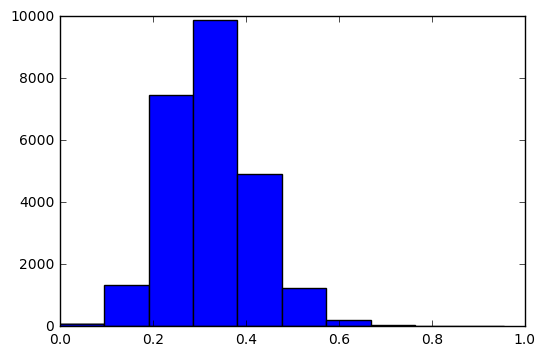

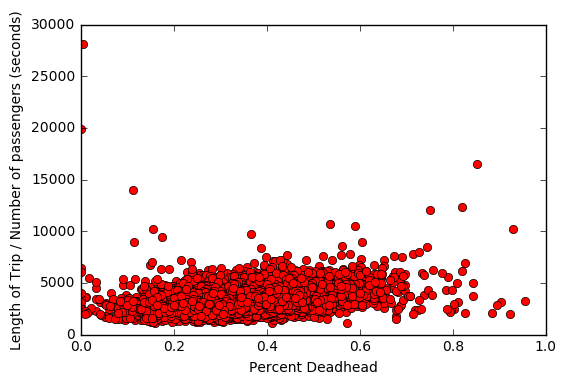

In [10]:
plt.hist(data.PctDeadhead)
plt.show()
plt.close()
plt.plot(data.PctDeadhead, data.CostProxy, 'ro')
plt.xlabel('Percent Deadhead')
plt.ylabel('Length of Trip / Number of passengers (seconds)')
plt.show()
plt.close()

In [11]:
new_data[new_data.PctDeadhead > 0.9]

,ServiceDate,Run,CostProxy,PctDeadhead
1026,0015-01-09,BD1,10243.000000,0.929806
1115,0015-03-03,BD3,3120.000000,0.903526
3754,0015-04-16,6060,3225.000000,0.954625
13573,0015-04-24,4121,1997.142857,0.922818


In [12]:
test = full_data[(full_data.ServiceDate == '0015-04-13') & (full_data.Run == '2021')]
test

,ServiceDate,Run,ProviderId,EvOrder,EvId,ReqTime,SchTime,ReqLate,Activity,ETA,...,BookingId,SchedStatus,SubtypeAbbr,FundingSourceId1,PassOn,SpaceOn,PassOff,SpaceOff,ClientId,MobAids


In [13]:
print test.Activity.unique()
if 8 in test.Activity.unique(): 
    print 'true'
else:
    print 'false'

[]
false


In [14]:
full_data[(full_data.ServiceDate == '0015-04-13') & (full_data.Run == 2064)]

,ServiceDate,Run,ProviderId,EvOrder,EvId,ReqTime,SchTime,ReqLate,Activity,ETA,...,BookingId,SchedStatus,SubtypeAbbr,FundingSourceId1,PassOn,SpaceOn,PassOff,SpaceOff,ClientId,MobAids


In [15]:
brokenruns  = pd.read_csv('../data/4mo_broken_buses.csv', index_col=0)